<a href="https://colab.research.google.com/github/suryamn1/deep-learning-projects/blob/main/RNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Software Defect Prediction using RNN

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
up=files.upload()

Saving jm1_csv.csv to jm1_csv.csv


In [4]:
df = pd.read_csv('jm1_csv.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [6]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loc,10885.0,42.016178,76.593332,1.0,11.00,23.00,46.00,3442.00
v(g),10885.0,6.348590,13.019695,1.0,2.00,3.00,7.00,470.00
ev(g),10885.0,3.401047,6.771869,1.0,1.00,1.00,3.00,165.00
iv(g),10885.0,4.001599,9.116889,1.0,1.00,2.00,4.00,402.00
n,10885.0,114.389738,249.502091,0.0,14.00,49.00,119.00,8441.00
v,10885.0,673.758017,1938.856196,0.0,48.43,217.13,621.48,80843.08
l,10885.0,0.135335,0.160538,0.0,0.03,0.08,0.16,1.30
d,10885.0,14.177237,18.709900,0.0,3.00,9.09,18.90,418.20
i,10885.0,29.439544,34.418313,0.0,11.86,21.93,36.78,569.78
e,10885.0,36836.365343,434367.801255,0.0,161.94,2031.02,11416.43,31079782.27


## Train Test Split

In [8]:
df['status'] = df['defects'].map({True:1,False:0})

In [9]:
df=df.drop('defects',axis=1)
X = df.drop('status',axis=1).iloc[:,:-10].values
y = df['status'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [12]:
X_train.shape

(8163, 11)


## Scaling Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model
                  
    

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras.layers.recurrent import LSTM
from keras.regularizers import l2

In [18]:
X_train = X_train.reshape(len(X_train), 1, X_train.shape[1])
X_test = X_test.reshape(len(X_test), 1, X_test.shape[1])

In [19]:
X_train.shape

(8163, 1, 11)

In [20]:
model = Sequential()

model.add(LSTM(30,
    return_sequences=True,input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(
    15,
    return_sequences=False,input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid',input_shape=(X_train.shape[1:])))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 30)             5040      
                                                                 
 dropout (Dropout)           (None, 1, 30)             0         
                                                                 
 lstm_1 (LSTM)               (None, 15)                2760      
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 batch_normalization (BatchN  (None, 15)               60        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 30)                480       
                                                        

## Training the Model 

### Early Stopping 

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [24]:


model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/50
256/256 [==============================] - 8s 9ms/step - loss: 0.6164 - accuracy: 0.7954 - val_loss: 0.5201 - val_accuracy: 0.8005
Epoch 2/50
256/256 [==============================] - 2s 7ms/step - loss: 0.4779 - accuracy: 0.8104 - val_loss: 0.4832 - val_accuracy: 0.8016
Epoch 3/50
256/256 [==============================] - 2s 6ms/step - loss: 0.4677 - accuracy: 0.8102 - val_loss: 0.4691 - val_accuracy: 0.8016
Epoch 4/50
256/256 [==============================] - 2s 7ms/step - loss: 0.4618 - accuracy: 0.8109 - val_loss: 0.4667 - val_accuracy: 0.8027
Epoch 5/50
256/256 [==============================] - 2s 7ms/step - loss: 0.4630 - accuracy: 0.8135 - val_loss: 0.4634 - val_accuracy: 0.8038
Epoch 6/50
256/256 [==============================] - 2s 8ms/step - loss: 0.4561 - accuracy: 0.8133 - val_loss: 0.4619 - val_accuracy: 0.8068
Epoch 7/50
256/256 [==============================] - 2s 7ms/step - loss: 0.4607 - accuracy: 0.8111 - val_loss: 0.4621 - val_accuracy: 0.8064
Epoch 

In [25]:
model_loss = pd.DataFrame(model.history.history)

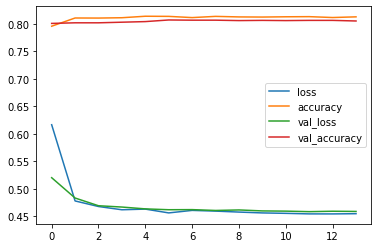

In [26]:
model_loss.plot()

# Model Evaluation

In [27]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [28]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [29]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2179
           1       0.59      0.07      0.13       543

    accuracy                           0.80      2722
   macro avg       0.70      0.53      0.51      2722
weighted avg       0.77      0.80      0.74      2722



In [32]:
print(metrics.accuracy_score(y_test,predictions))

0.804922850844967
